# **Importing Libraries**

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

# **Data Collection and Processing**

In [147]:
car_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/CAR DETAILS FROM CAR DEKHO.csv")

In [148]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [149]:
car_dataset.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [150]:
# Getting information about dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [151]:
# Checking for number of rows and columns
car_dataset.shape

(4340, 8)

In [152]:
# Checking for missing value
car_dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [153]:
# Counting the value for each columns
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


# **Encoding the catagirical data**

In [154]:
# Encoding categorical variables
car_dataset.replace({
    'fuel': {'Diesel': 0, 'Petrol': 1, 'CNG': 2, 'LPG': 3, 'Electric': 4},
    'seller_type': {'Dealer': 0, 'Individual': 1, 'Trustmark Dealer': 2},
    'transmission': {'Manual': 0, 'Automatic': 1},
    'owner': {'First Owner': 0, 'Second Owner': 1, 'Third Owner': 2, 'Fourth & Above Owner': 3, 'Test Drive Car': 4}
}, inplace=True)

<ipython-input-154-eb5bc38130ff>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({


In [155]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,1,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,1,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,1,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,1,0,1


In [156]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   int64 
 5   seller_type    4340 non-null   int64 
 6   transmission   4340 non-null   int64 
 7   owner          4340 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 271.4+ KB


# **Adding another column for Age**

In [157]:
# Convert 'year' to 'Age' and drop 'year' column
current_year = pd.Timestamp.now().year
car_dataset['Age'] = current_year - car_dataset['year']
car_dataset.drop(['year'], axis=1, inplace=True)

In [158]:
car_dataset.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
0,Maruti 800 AC,60000,70000,1,1,0,0,17
1,Maruti Wagon R LXI Minor,135000,50000,1,1,0,0,17
2,Hyundai Verna 1.6 SX,600000,100000,0,1,0,0,12
3,Datsun RediGO T Option,250000,46000,1,1,0,0,7
4,Honda Amaze VX i-DTEC,450000,141000,0,1,0,1,10


# Splitting the data

 1.   x---> Non-label data
 2.   y---> Label of data



In [159]:
x = car_dataset.drop(['name','selling_price'],axis=1)
y = car_dataset['selling_price']

In [160]:
# Scale numerical columns
scaler = StandardScaler()
x[['km_driven', 'Age']] = scaler.fit_transform(x[['km_driven', 'Age']])

# **Splitting for train-test**

In [161]:
# Split the dataset with 20% test size
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# **Model Training**

In [162]:
# loading the linear regression model
rf_model = RandomForestRegressor(random_state=2)

In [163]:
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=2)

# **Model Evaluation on training data**

In [164]:
# Prediction on training data
training_data_prediction = rf_model.predict(x_train)

In [169]:
# R square error
error_score1 = metrics.r2_score(y_train,training_data_prediction)
print("R square error : ",error_score1)

R square error :  0.9155771407447506


# **Model Evaluation on testing data**

In [166]:
test_data_prediction = rf_model.predict(x_test)

In [170]:
# R square error
error_score2 = metrics.r2_score(y_test,test_data_prediction)
print("R square error : ",error_score2)

R square error :  0.7065279209644021


# **Visualize the actual and prediced price**

         Dataset  R-squared
0  Training Data   0.915577
1   Testing Data   0.706528


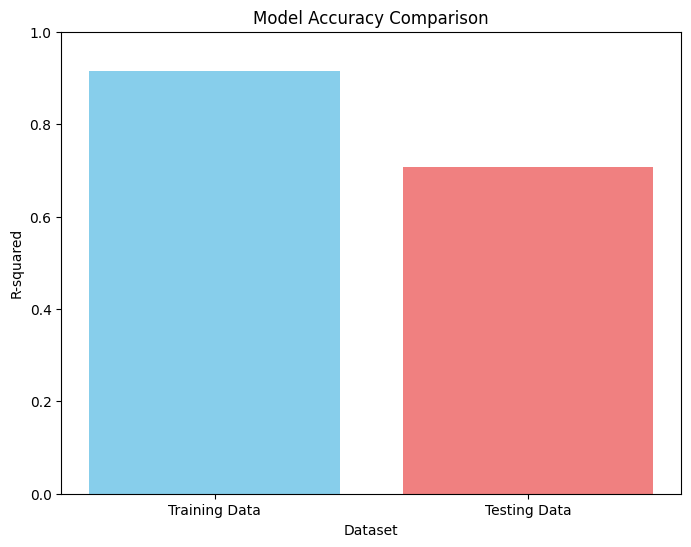

In [168]:

# Create a table-like visualization
data = {'Dataset': ['Training Data', 'Testing Data'], 'R-squared': [error_score1, error_score2]}
accuracy_table = pd.DataFrame(data)

# Display the table
print(accuracy_table)

# Create a bar chart for visualization
plt.figure(figsize=(8, 6))
plt.bar(accuracy_table['Dataset'], accuracy_table['R-squared'], color=['skyblue', 'lightcoral'])
plt.xlabel('Dataset')
plt.ylabel('R-squared')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()